# Currencies Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of currencies.)
    
    NOTE: pinkfish does not yet have full support for currencies backtesting, and
    the currency data from yahoo finance isn't very good.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### MICRO FUTURES

In [3]:
# symbol: (description, multiplier)


currencies = {
#     'BTCUSD=X': 'Bitcoin USD Futures', 1),
#     'ETHUSD=X': 'Ethereum USD 
    'EURUSD=X': 'EUR/USD Futures',
    'JPY=X':    'USD/JPY Futures',
    'GBPUSD=X': 'GBP/USD Futures',
    'AUDUSD=X': 'AUD/USD Futures',
    'NZDUSD=X': 'NZD/USD Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'GBPJPY=X': 'GBP/JPY Futures',
    'EURGBP=X': 'EUR/GBP Futures',
    'EURCAD=X': 'EUR/CAD Futures',
    'EURSEK=X': 'EUR/SEK Futures',
    'EURCHF=X': 'EUR/CHF Futures',
    'EURHUF=X': 'EUR/HUF Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'CNY=X':    'USD/CNY Futures',
    'HKD=X':    'USD/HKD Futures',
    'SGD=X':    'USD/SGD Futures',
    'INR=X':    'USD/INR Futures',
    'MXN=X':    'USD/MXN Futures',
    'PHP=X':    'USD/PHP Futures',
    'IDR=X':    'USD/IDR Futures',
    'THB=X':    'USD/THB Futures',
    'MYR=X':    'USD/MYR Futures',
    'ZAR=X':    'USD/ZAR Futures',
    'RUB=X':    'USD/RUB Futures'
}

symbols = list(currencies)
#symbols = ['EURUSD=X']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'force_stock_market_calendar' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'lookback' : 1,
    'sma_timeperiod': 20,
    'sma_pct_band': 0,
    'use_regime_filter' : True,
    'use_vola_weight' : False
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()




View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2007-03-02,0,1.32,3302,entry,LONG,EURUSD=X
0,2007-03-02,1,7.39,588,entry,LONG,ZAR=X
0,2007-03-02,2,0.68,6418,entry,LONG,EURGBP=X
0,2007-03-02,3,0.78,5544,entry,LONG,AUDUSD=X
0,2007-03-02,4,1.55,2808,entry,LONG,EURCAD=X


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2007-03-02,0.78,2007-03-05,0.77,-0.01,-79.97,5544,-79.97,LONG,AUDUSD=X
0,2007-03-02,0.69,2007-03-05,0.67,-0.02,-97.81,6309,-177.78,LONG,NZDUSD=X
0,2007-03-02,1.55,2007-03-09,1.54,-0.01,-25.55,2808,-203.33,LONG,EURCAD=X
0,2007-03-02,7.82,2007-03-09,7.81,-0.01,-5.00,555,-208.33,LONG,HKD=X
0,2007-03-02,11.13,2007-03-22,10.98,-0.15,-58.62,390,-266.94,LONG,MXN=X


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2023-12-20,96788.24,96788.24,96788.24,21476,67009.57,1.00,-
2023-12-21,96671.37,96671.37,96671.37,22065,62807.59,1.00,O
2023-12-22,96884.31,96884.31,96884.31,21166,66990.63,1.00,X
2023-12-26,96847.45,96847.45,96847.45,21166,66990.63,1.00,-
2023-12-27,96889.36,96889.36,96889.36,5080,88481.04,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                   2007-03-02
end                                                     2023-12-27
beginning_balance                                           100000
ending_balance                                            96889.36
total_net_profit                                          -3110.64
gross_profit                                              80791.88
gross_loss                                               -83902.52
profit_factor                                                 0.96
return_on_initial_capital                                    -3.11
annual_return_rate                                           -0.19
trading_period                           16 years 9 months 25 days
pct_time_in_market                                           99.95
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
CNY=X,$828.34,0.04,-0.27,-6.12
EURUSD=X,-$340.97,0.04,0.11,2.52
ZAR=X,"$1,902.66",0.04,-0.61,-14.07
EURGBP=X,$822.24,0.04,-0.26,-6.08
GBPJPY=X,$50.93,0.04,-0.02,-0.38
MYR=X,"$1,811.15",0.04,-0.58,-13.39
INR=X,"$1,738.86",0.04,-0.56,-12.86
IDR=X,$0.00,0.04,-0.00,-0.00
GBPUSD=X,"-$1,056.75",0.04,0.34,7.81
PHP=X,-$628.40,0.04,0.20,4.65


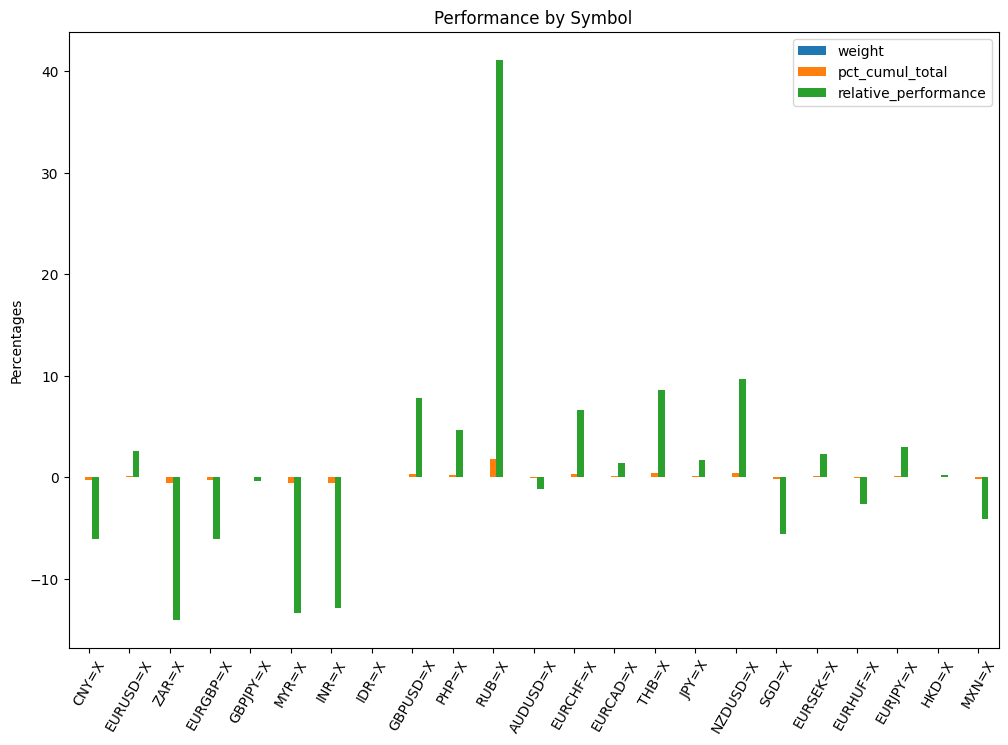

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,CNY=X,EURUSD=X,ZAR=X,EURGBP=X,GBPJPY=X,MYR=X,INR=X,IDR=X,GBPUSD=X,PHP=X,...,EURCAD=X,THB=X,JPY=X,NZDUSD=X,SGD=X,EURSEK=X,EURHUF=X,EURJPY=X,HKD=X,MXN=X
CNY=X,1.00,-0.11,0.14,0.01,-0.05,0.06,0.10,0.02,-0.15,0.14,...,-0.02,0.10,0.06,-0.15,0.20,0.08,0.06,-0.05,0.05,0.06
EURUSD=X,-0.11,1.00,-0.37,0.28,0.24,-0.16,-0.19,-0.03,0.51,-0.16,...,0.42,-0.22,0.12,0.48,-0.56,-0.10,-0.22,0.49,-0.11,-0.21
ZAR=X,0.14,-0.37,1.00,0.01,-0.36,0.17,0.32,0.03,-0.44,0.19,...,0.07,0.20,-0.05,-0.59,0.59,0.30,0.44,-0.40,0.07,0.37
EURGBP=X,0.01,0.28,0.01,1.00,-0.42,-0.03,0.02,0.00,-0.45,-0.00,...,0.37,-0.06,-0.10,0.00,-0.07,0.12,-0.00,0.17,0.00,0.07
GBPJPY=X,-0.05,0.24,-0.36,-0.42,1.00,-0.10,-0.21,-0.01,0.66,-0.10,...,-0.09,-0.09,0.56,0.38,-0.27,-0.22,-0.29,0.78,-0.05,-0.25
MYR=X,0.06,-0.16,0.17,-0.03,-0.10,1.00,0.10,0.02,-0.16,0.11,...,-0.03,0.11,0.03,-0.20,0.27,0.07,0.11,-0.14,0.04,0.24
INR=X,0.10,-0.19,0.32,0.02,-0.21,0.10,1.00,0.01,-0.24,0.25,...,0.03,0.17,-0.01,-0.30,0.36,0.15,0.20,-0.23,0.09,0.14
IDR=X,0.02,-0.03,0.03,0.00,-0.01,0.02,0.01,1.00,-0.04,0.02,...,-0.02,0.03,0.02,-0.04,0.03,0.02,0.01,-0.01,0.02,0.02
GBPUSD=X,-0.15,0.51,-0.44,-0.45,0.66,-0.16,-0.24,-0.04,1.00,-0.17,...,0.15,-0.20,-0.07,0.56,-0.58,-0.19,-0.25,0.40,-0.10,-0.25
PHP=X,0.14,-0.16,0.19,-0.00,-0.10,0.11,0.25,0.02,-0.17,1.00,...,0.00,0.19,0.01,-0.19,0.28,0.09,0.13,-0.11,0.10,0.09


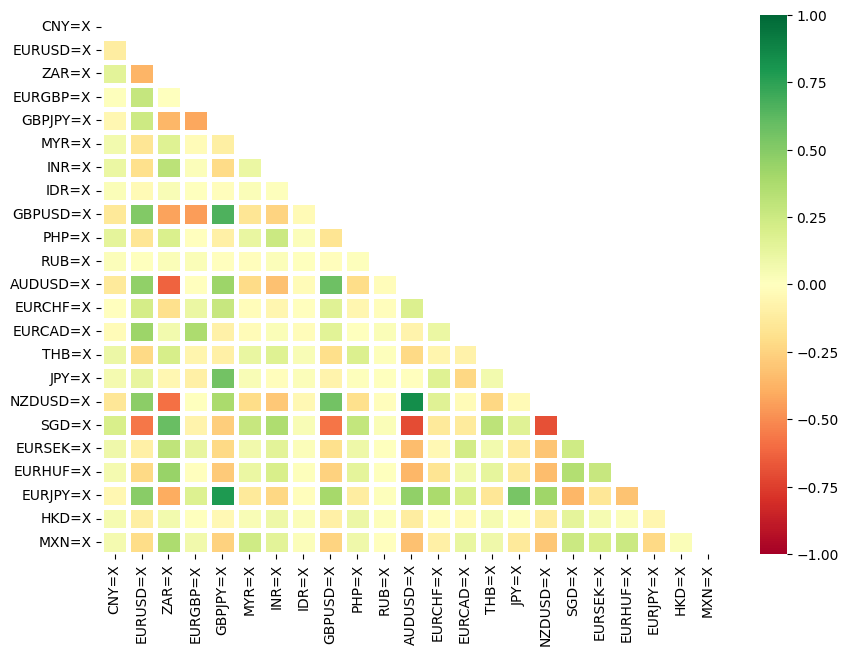

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

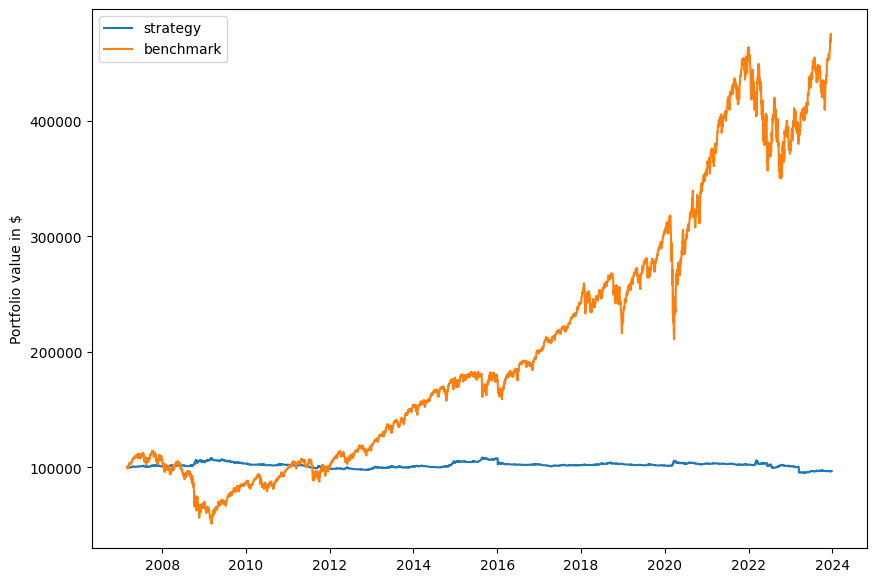

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,-0.19,9.63
max_closed_out_drawdown,-12.29,-55.16
annualized_return_over_max_drawdown,0.02,0.17
best_month,4.81,23.61
worst_month,-4.86,-30.98
sharpe_ratio,-0.05,0.56
sortino_ratio,-0.05,0.68
monthly_std,0.78,4.79
annual_std,2.67,17.29


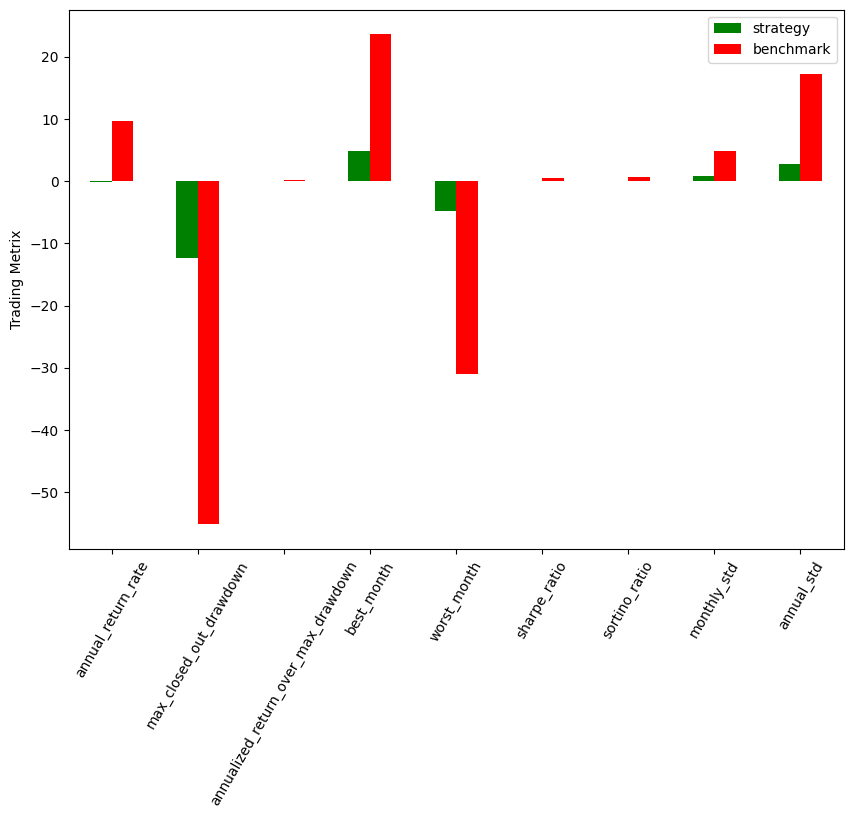

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            -0.05
sharpe_ratio_max        -0.00
sharpe_ratio_min        -0.10
strategy risk            0.03
instrument risk          0.17
optimal target risk     -0.05
half kelly criterion    -0.03
aggressive leverage     -0.29
moderate leverage       -0.15
conservative leverage   -0.28
dtype: float64